#  ANZ VIRTUAL INTERNSHIP PROJECT  


The task is based on a synthesised transaction dataset containing 3 months worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

## TASK 2 : Predictive Analytics
### 1. Data :
The data is provided by the Data ANZ itself when we enroll ourselves in their program.
### 2. Features :
status : denotes the status of the transaction posted or authorized for transaction.

card_present_flag : Did the customer have a card during the transaction (1.1 = Yes or 0.0 = No).

bpay_biller_code : unique code of the BPay Transaction done by the customer.

account : account number of the customers who made transaction.

currency : currency type in which the transaction has been done (AUD dollars).

long_lat : Longitude and Latitude location of the customer.

txn_description : the mode of transaction the customer has done.

merchant_id : the merchant id where the customers have done their transaction.

merChant_code : unique merchant code for each customer.

first_name : first name of the customer.

balance : balance the customer had during the transaction of period 3 months.

date : date when the transaction took place.

gender : gender of the customer(Male or Female).

age : age of the customer.

merchant_suburb : the district or city where the merchant is located.

merchant_state : the state where the merchant is located.

extraction : extraction of the transaction data.

amount : the amount transacted by the customer.

transaction_id : unique transaction id given by the merchant when the customer makes an transaction.

country : country where the customer's are located (Australia).

customer_id = id for the customer's to differentiate them as unique.

merchant_long_lat : the latitude and longitude location of the merchant.

movement : mode of transaction (credit or debit).

### The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights we can gather from the tasks below will be genuine

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Importing dataset and performing feature selection

In [2]:
data = pd.read_excel('E:\Forage Internship\ANZ\ANZ synthesised transaction dataset.xlsx')
data.head(30)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [3]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [4]:
# selecting important featuers
data=data[["customer_id","age","txn_description","balance","amount"]]

In [5]:
data.head()

,customer_id,age,txn_description,balance,amount
0,CUS-2487424745,26,POS,35.39,16.25
1,CUS-2487424745,26,SALES-POS,21.20,14.19
2,CUS-2142601169,38,POS,5.71,6.42
3,CUS-1614226872,40,SALES-POS,2117.22,40.90
4,CUS-2487424745,26,SALES-POS,17.95,3.25


In [6]:
print(data['txn_description'].unique())

['POS' 'SALES-POS' 'PAYMENT' 'INTER BANK' 'PAY/SALARY' 'PHONE BANK']


In [7]:
plot_data= data.groupby(["customer_id"]).mean().reset_index()
plot_data.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53,2275.852055,222.862603
1,CUS-1117979751,21,9829.929000,339.843700
2,CUS-1140341822,28,5699.212250,212.632500
3,CUS-1147642491,34,9032.841186,245.600169
4,CUS-1196156254,34,22272.433755,147.145796


## Finding out the mean salary of each customer

In [8]:
salary=data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[["customer_id","amount"]]
salary=salary.rename(columns = {'amount':'salary'})

In [9]:
salary.head()

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73


### Create some plots to analyze relation between existing data

In [10]:
plot_data=pd.merge(plot_data, salary, on="customer_id")
plot_data.head()

,customer_id,age,balance,amount,salary
0,CUS-1005756958,53,2275.852055,222.862603,970.47
1,CUS-1117979751,21,9829.929000,339.843700,3578.65
2,CUS-1140341822,28,5699.212250,212.632500,1916.51
3,CUS-1147642491,34,9032.841186,245.600169,1711.39
4,CUS-1196156254,34,22272.433755,147.145796,3903.73


### Salary v/s Age

C:\Users\Kushal Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='salary'>

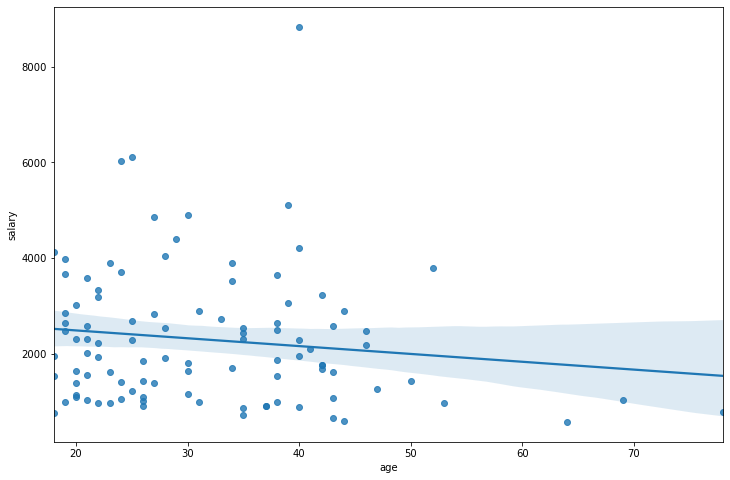

In [11]:
plt.figure(figsize=(12, 8))
sns.regplot("age", "salary", data=plot_data)

### Salary v/s Account Balance

C:\Users\Kushal Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='salary'>

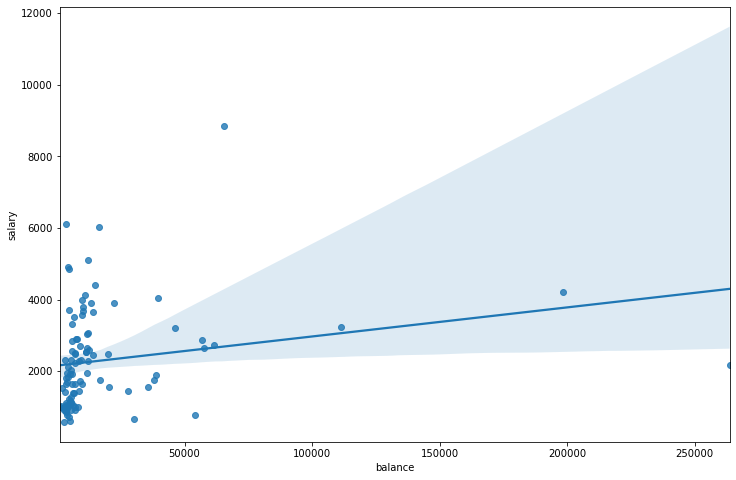

In [12]:
plt.figure(figsize=(12, 8))
sns.regplot("balance", "salary", fit_reg=True, data=plot_data)

### Salary v/s Transaction Amount

C:\Users\Kushal Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount', ylabel='salary'>

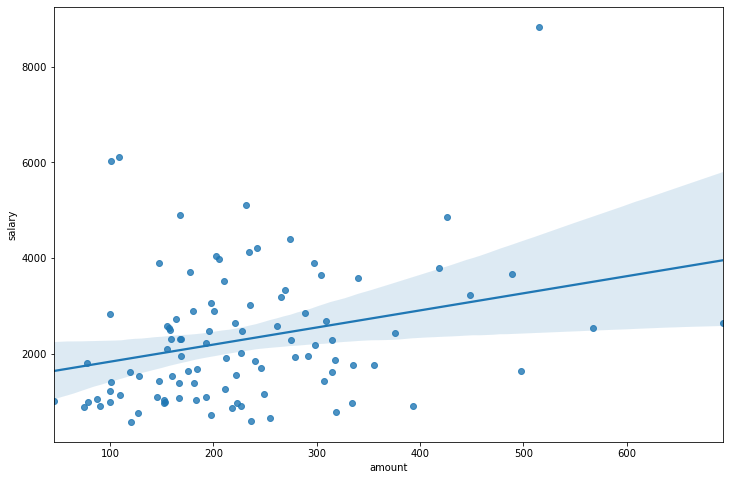

In [13]:
plt.figure(figsize=(12, 8))
sns.regplot("amount", "salary", fit_reg=True, data=plot_data)

# Data Preparation
## Feature Generation
## Mean POS (Point of Sale) for each customer

In [14]:
# POS indicates spending behavior of customer
pos=data[data["txn_description"]==("POS"or"SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[["customer_id","amount"]]
pos=pos.rename(columns = {'amount':'pos'})

In [15]:
pos.head()

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432


In [16]:
len(pos)

100

### Mean payment made by the customer

In [17]:
payment=data[data["txn_description"]=="PAYMENT"].groupby("customer_id").mean().reset_index()
payment=payment[["customer_id","amount"]]
payment=payment.rename(columns = {'amount':'payment'})

In [18]:
payment.head()

,customer_id,payment
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000


In [19]:
len(payment)

100

### Mean Inter-bank transfer by each customer

In [20]:
interbank=data[data["txn_description"]=='INTER BANK'].groupby("customer_id").mean().reset_index()
interbank=interbank[["customer_id","amount"]]
interbank=interbank.rename(columns = {'amount':'interbank'})

In [21]:
interbank.head()

,customer_id,interbank
0,CUS-1117979751,1001.0000
1,CUS-1140341822,90.0000
2,CUS-1147642491,125.0000
3,CUS-1196156254,153.4000
4,CUS-1271030853,76.1875


In [22]:
len(interbank)

68

### Mean phone transaction made by the customer

In [23]:
#Banking via phone/online pay

phonebank=data[data["txn_description"]=='PHONE BANK'].groupby("customer_id").mean().reset_index()
phonebank=phonebank[["customer_id","amount"]]
phonebank=phonebank.rename(columns = {'amount':'phonebank'})

In [24]:
phonebank.head()

,customer_id,phonebank
0,CUS-1005756958,182.0
1,CUS-1646183815,150.0
2,CUS-1896554896,1916.0
3,CUS-2155701614,82.0
4,CUS-2348881191,1629.0


In [25]:
len(phonebank)

16

### Merging relevant dataframes

In [26]:
customer=data.groupby("customer_id").mean().reset_index()
customer=customer[["customer_id","age","balance"]]
customer.head()

,customer_id,age,balance
0,CUS-1005756958,53,2275.852055
1,CUS-1117979751,21,9829.929000
2,CUS-1140341822,28,5699.212250
3,CUS-1147642491,34,9032.841186
4,CUS-1196156254,34,22272.433755


In [27]:
df=pd.merge(customer, payment, on="customer_id")
df=pd.merge(df, pos, on="customer_id")
df=pd.merge(df, salary, on="customer_id")

In [28]:
df.head()

,customer_id,age,balance,payment,pos,salary
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73


## Feature selection for new features
### Payment v/s Salary

C:\Users\Kushal Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment', ylabel='salary'>

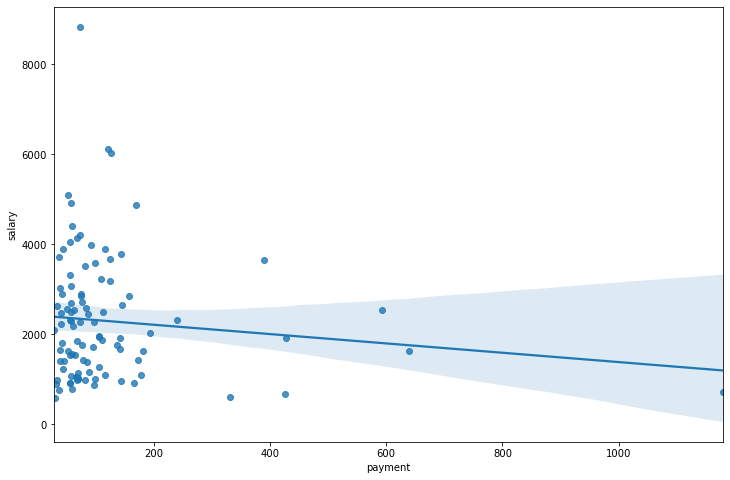

In [29]:
plt.figure(figsize=(12, 8))
sns.regplot("payment", "salary", fit_reg=True, data=df)

### Salary vs Point Of Sale

C:\Users\Kushal Gupta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pos', ylabel='salary'>

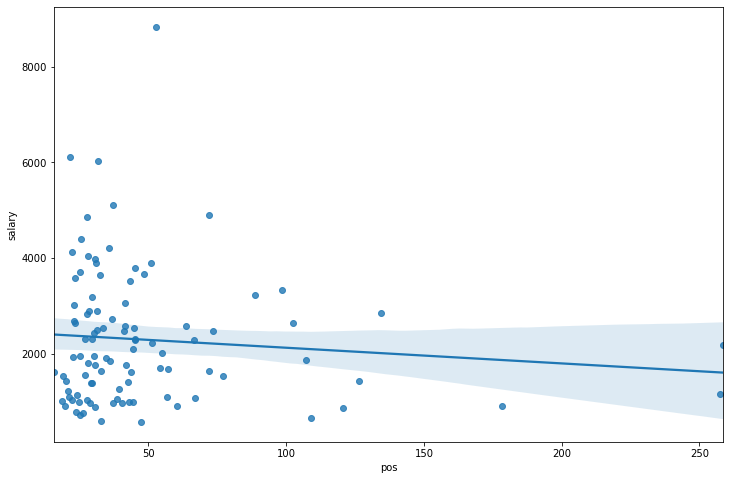

In [30]:
plt.figure(figsize=(12, 8))
sns.regplot("pos", "salary", fit_reg=True, data=df)

## Model building and predictive analytics
## Supervised models
## Linear Regression Model

In [31]:
X=df[["age","balance","payment","pos"]].values
y=df["salary"].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [40]:
lr_model1 = LinearRegression()

In [41]:
lr_model1.fit(X_train, y_train)
lr_model1.score(X, y)

0.11930439490077771

In [42]:
 y_pred=lr.predict(X_test)

In [43]:
print('Coefficient of determination: ', r2_score(y_test, y_pred))

Coefficient of determination:  0.07666219584715872


In [44]:
# Sample prediction values

print("The model predicts salary will be=")
print(lr_model1.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
1467.1295983855503


## Decision Tree Regressor

In [118]:
dt_model2 = DecisionTreeRegressor()


In [119]:
dt_model2.fit(X_train, y_train)
dt_model2.score(X_train, y_train)

1.0

In [120]:
dt_model2.predict(X_test)

array([1002.13, 2639.76, 3517.61, 2218.73, 3071.14, 3649.51, 2840.15,
       1002.13, 2280.36, 1272.47,  576.  , 2500.  , 3026.95, 2639.76,
       3676.94, 2718.51, 1099.7 , 3676.94, 2218.73, 3517.61])

In [121]:
dt_model2.score(X_test, y_test)

0.20541409504758557

In [97]:
# Sample prediction values

print("The model predicts salary will be=")
print(dt_model2.predict([[60,5000,100,50]])[0])

The model predicts salary will be=
1002.1299999999998


## Unsupervised Models
## Segmentation using K-Means Clustering

In [73]:
df

,customer_id,age,balance,payment,pos,salary
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73
...,...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,1180.000000,25.022143,725.32
96,CUS-809013380,21,3756.902903,70.136364,22.255098,1037.07
97,CUS-860700529,30,3462.276009,41.933333,28.164845,1808.62
98,CUS-880898248,26,8528.830385,77.500000,20.101429,1433.98


In [74]:
X=df[["age","balance","payment","pos","salary"]]
X.shape

(100, 5)

In [75]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\Users\Kushal Gupta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


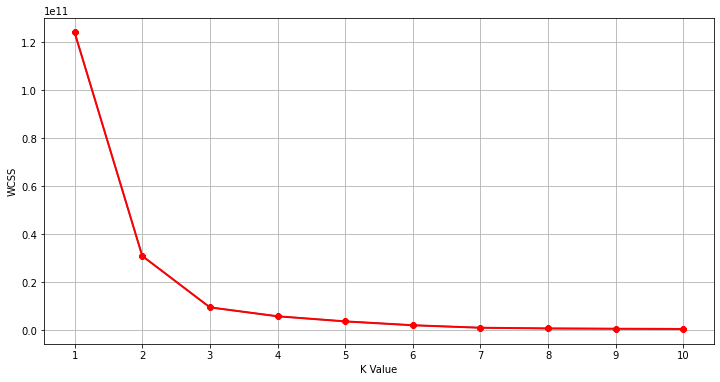

In [76]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [77]:
km=KMeans(n_clusters=3)
clusters = km.fit_predict(X)
df["label"] = clusters

In [78]:
df

,customer_id,age,balance,payment,pos,salary,label
0,CUS-1005756958,53,2275.852055,144.000000,28.769615,970.47,0
1,CUS-1117979751,21,9829.929000,98.925000,23.321923,3578.65,0
2,CUS-1140341822,28,5699.212250,142.000000,34.781282,1916.51,0
3,CUS-1147642491,34,9032.841186,96.185185,54.271316,1711.39,0
4,CUS-1196156254,34,22272.433755,43.100000,31.157432,3903.73,0
...,...,...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,1180.000000,25.022143,725.32,0
96,CUS-809013380,21,3756.902903,70.136364,22.255098,1037.07,0
97,CUS-860700529,30,3462.276009,41.933333,28.164845,1808.62,0
98,CUS-880898248,26,8528.830385,77.500000,20.101429,1433.98,0


In [79]:
print("Fist Group: ")
print(" ")
print(df[df["label"]==0])

Fist Group: 
 
       customer_id  age       balance      payment        pos   salary  label
0   CUS-1005756958   53   2275.852055   144.000000  28.769615   970.47      0
1   CUS-1117979751   21   9829.929000    98.925000  23.321923  3578.65      0
2   CUS-1140341822   28   5699.212250   142.000000  34.781282  1916.51      0
3   CUS-1147642491   34   9032.841186    96.185185  54.271316  1711.39      0
4   CUS-1196156254   34  22272.433755    43.100000  31.157432  3903.73      0
..             ...  ...           ...          ...        ...      ...    ...
95    CUS-72755508   35   4497.557069  1180.000000  25.022143   725.32      0
96   CUS-809013380   21   3756.902903    70.136364  22.255098  1037.07      0
97   CUS-860700529   30   3462.276009    41.933333  28.164845  1808.62      0
98   CUS-880898248   26   8528.830385    77.500000  20.101429  1433.98      0
99   CUS-883482547   19   9877.452697    91.446809  30.635098  3977.46      0

[87 rows x 7 columns]


In [80]:
print("Second Group: ")
print(" ")
print(df[df["label"]==1])

Second Group: 
 
       customer_id  age        balance    payment         pos   salary  label
43  CUS-2370108457   46  263753.766119  61.750000  258.643636  2179.96      1
91   CUS-527400765   40  198565.143775  72.216216   35.570500  4216.04      1


In [81]:
print("Third Group: ")
print(" ")
print(df[df["label"]==2])

Third Group: 
 
       customer_id  age        balance     payment         pos   salary  label
17  CUS-1609060617   19   56685.795802   75.454545  134.343000  2854.74      2
21  CUS-1646183815   78   54240.641471   58.437500   23.736667   782.42      2
27  CUS-1816693151   40   65420.404231   73.567568   52.825455  8835.98      2
33  CUS-2059096722   21   35816.951949   58.914286   27.022973  1560.20      2
53  CUS-2663907001   28   39427.873576   55.192771   28.165200  4054.77      2
57  CUS-2819545904   42  111300.797619  109.800000   88.541818  3231.26      2
60  CUS-3117610635   33   61491.350647   76.863636   36.737391  2718.51      2
63  CUS-3151318058   42   37842.077755   75.684211   30.715000  1757.82      2
67  CUS-3249305314   38   38687.672843  111.214286  107.296250  1880.95      2
77  CUS-3462882033   22   46338.733837  124.500000   29.371304  3195.01      2
87   CUS-495599312   38   57566.579032  144.500000  102.412500  2647.38      2
